# Data Loading

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf



In [2]:
data=pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
data = data.dropna(subset=['Life expectancy '])

# Potential Baseline Model

In [5]:
#sort and shift to use as baseline prediction: predict last year's life expectancy for a given country
data.sort_values(['Country', 'Year'])


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3


In [138]:
#prediction
a = data.sort_values(['Country', 'Year']).groupby('Country')['Life expectancy '].shift(1)


In [139]:
#original
b = data.sort_values(['Country', 'Year'])['Life expectancy ']


In [143]:
baseline = pd.concat([b, a], axis=1)
baseline.columns = ['y', 'baseline_pred']
baseline = baseline.dropna()

In [148]:
#baseline prediction R^2
from sklearn.metrics import r2_score
r2_score(baseline['y'], baseline['baseline_pred'])

0.9606324393760807

In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
#drop features that aren't related to our analysis

data_relevant = data.drop(['Adult Mortality', 'infant deaths', 'under-five deaths ', 'Income composition of resources', ' thinness  1-19 years', ' thinness 5-9 years'], axis=1)


# Additional Dataset - housing price to income ratio

In [11]:
#scrape data from websites by year 2009-2015

PI_2009 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2009&displayColumn=0")[1].drop('Rank', axis=1)
PI_2010 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2010&displayColumn=0")[1].drop('Rank', axis=1)
PI_2011 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2011&displayColumn=0")[1].drop('Rank', axis=1)
PI_2012 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2012&displayColumn=0")[1].drop('Rank', axis=1)
PI_2013 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2013&displayColumn=0")[1].drop('Rank', axis=1)
PI_2014 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2014&displayColumn=0")[1].drop('Rank', axis=1)
PI_2015 = pd.read_html("https://www.numbeo.com/property-investment/rankings_by_country.jsp?title=2015&displayColumn=0")[1].drop('Rank', axis=1)

PI_2009['Year'] = 2009
PI_2010['Year'] = 2010
PI_2011['Year'] = 2011
PI_2012['Year'] = 2012
PI_2013['Year'] = 2013
PI_2014['Year'] = 2014
PI_2015['Year'] = 2015

In [12]:
a = pd.concat([PI_2009, PI_2010, PI_2011, PI_2012, PI_2013, PI_2014, PI_2015])
merged_housing = pd.merge(a, data_relevant,  how='inner', left_on=['Country','Year'], right_on = ['Country','Year'])


# Addtional Dataset - health related

In [13]:
# https://ourworldindata.org/air-pollution
health=pd.read_csv("number-of-deaths-by-risk-factor.csv")

In [14]:
merged_health = pd.merge(merged_housing, health, how='left', left_on=['Country','Year'], right_on = ['Entity','Year'])
merged_health

,Country,Price To Income Ratio,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
0,Romania,30.29,2009,Developed,73.1,10.40,14.963736,95.0,8,56.3,...,17130.992801,12489.67,4733.568243,22574.946857,6538.888006,603.350019,123.958023,22058.992661,15038.633136,10586.524299
1,Latvia,27.08,2009,Developed,72.6,9.85,1137.623700,92.0,0,58.5,...,1834.233729,1587.23,882.838236,2078.299101,1062.798487,105.716080,9.374510,2937.139330,2097.537236,1090.827152
2,Ukraine,24.13,2009,Developing,69.2,8.71,324.549135,66.0,0,58.0,...,56102.791592,51102.03,23371.022058,46832.845889,29696.689540,2303.732890,29.876244,87866.548283,69715.949397,47547.972619
3,Poland,23.90,2009,Developed,75.7,10.70,1299.159757,98.0,115,57.8,...,27548.753634,24812.30,7545.387270,18843.290717,9503.649248,2603.676152,411.101820,27727.191585,22027.074757,13415.549321
4,Lithuania,22.50,2009,Developed,72.2,12.40,1446.529217,95.0,0,59.7,...,2323.015138,2267.74,1084.797616,2841.852186,1093.304720,148.243179,20.700256,3747.248567,3190.375171,1888.950272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Belize,3.67,2015,Developing,71.0,NaN,0.000000,94.0,0,5.9,...,104.239178,75.64,19.343316,21.785738,9.820158,4.477516,0.053285,81.336949,54.331052,28.073609
560,Honduras,3.51,2015,Developing,74.6,NaN,0.000000,97.0,0,51.0,...,2841.582116,933.24,639.985059,922.686796,263.921078,89.513886,0.019254,2047.024999,2019.583003,1319.615571
561,Oman,3.23,2015,Developing,76.6,NaN,0.000000,99.0,0,54.6,...,861.221928,854.08,186.532813,389.681615,255.029004,18.156403,1.717070,918.958413,728.475609,445.963263
562,South Africa,3.14,2015,Developing,62.9,NaN,0.000000,75.0,17,51.1,...,24986.220022,19754.31,2596.452757,6589.184325,2834.620870,967.537603,113.659645,11188.799648,10325.301418,4545.244921


In [15]:
merged_health.isnull().sum()

Country                                                                                     0
Price To Income Ratio                                                                       0
Year                                                                                        0
Status                                                                                      0
Life expectancy                                                                             0
Alcohol                                                                                    97
percentage expenditure                                                                      0
Hepatitis B                                                                                58
Measles                                                                                     0
 BMI                                                                                        0
Polio                                                       

In [16]:
#drop variables with too many NAs
merged_health = merged_health.drop(['Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number)'], axis=1)


In [17]:
#fill NA values with mean
merged_health['Alcohol']=merged_health['Alcohol'].fillna(value=merged_health['Alcohol'].mean())
merged_health['Hepatitis B']=merged_health['Hepatitis B'].fillna(value=merged_health['GDP'].mean())
merged_health['Total expenditure']=merged_health['Total expenditure'].fillna(value=merged_health['Population'].mean())
merged_health['GDP']=merged_health['GDP'].fillna(value=merged_health['GDP'].mean())
merged_health['Population']=merged_health['Population'].fillna(value=merged_health['Population'].mean())


In [18]:
merged_health.isnull().sum()

Country                                                                                   0
Price To Income Ratio                                                                     0
Year                                                                                      0
Status                                                                                    0
Life expectancy                                                                           0
Alcohol                                                                                   0
percentage expenditure                                                                    0
Hepatitis B                                                                               0
Measles                                                                                   0
 BMI                                                                                      0
Polio                                                                           

# standardizing

In [19]:
from sklearn import preprocessing

merged_health = merged_health.drop(['Country', 'Year', 'Entity', 'Code', 'Status'], axis=1)
merged_health_EDA = merged_health.copy() 

In [23]:
# X = merged_health.drop(['Life expectancy '], axis=1)
# y = merged_health['Life expectancy ']

# scaler = preprocessing.StandardScaler()
# scaled_features = scaler.fit_transform(X.values)
# X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
# # merged_health = pd.DataFrame(merged_health_scaled, columns=merged_health.columns)
# # merged_health = pd.concat([merged_health_scaled, merged_health['Life expectancy ']], axis=1)
# # merged_health.describe()

In [20]:
scaler = preprocessing.StandardScaler()
merged_health_scaled = scaler.fit_transform(merged_health)

merged_health = pd.DataFrame(merged_health_scaled, columns=merged_health.columns)
merged_health.describe()

,Price To Income Ratio,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
count,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,...,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02
mean,-1.763759e-16,-2.522805e-15,-3.779483e-17,1.259828e-17,1.889741e-17,3.149569e-18,2.220446e-16,-1.700767e-16,-5.039310e-17,-2.267690e-16,...,-4.724353e-18,2.834612e-17,-3.464526e-17,1.102349e-17,6.299138e-18,-2.362177e-17,-1.259828e-17,1.102349e-17,3.149569e-18,-3.622004e-17
std,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,...,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00
min,-1.318151e+00,-3.866422e+00,-1.522601e+00,-4.741585e-01,-3.595213e-01,-2.403258e-01,-2.214721e+00,-4.723251e+00,-4.642391e-01,-5.756458e+00,...,-2.464734e-01,-2.417177e-01,-3.036120e-01,-1.853436e-01,-2.933511e-01,-3.232723e-01,-3.052702e-01,-2.880922e-01,-3.190240e-01,-2.891018e-01
25%,-7.100065e-01,-3.583455e-01,-8.928184e-01,-4.674366e-01,-3.379908e-01,-2.403258e-01,-8.821098e-01,7.042380e-02,-4.642385e-01,1.523124e-02,...,-2.380147e-01,-2.313061e-01,-2.832183e-01,-1.783819e-01,-2.741528e-01,-2.975263e-01,-3.049304e-01,-2.674460e-01,-2.982257e-01,-2.728252e-01
50%,-2.231361e-01,-3.797321e-02,0.000000e+00,-3.853805e-01,-3.362384e-01,-2.381514e-01,5.049951e-01,2.986940e-01,-4.642382e-01,2.836819e-01,...,-2.127877e-01,-2.056277e-01,-2.426241e-01,-1.652526e-01,-2.168650e-01,-2.516696e-01,-2.824192e-01,-2.327846e-01,-2.549849e-01,-2.359580e-01
75%,4.268519e-01,8.430506e-01,8.063691e-01,-1.409732e-01,-3.354873e-01,-2.103674e-01,7.291611e-01,4.698967e-01,-4.642379e-01,4.850199e-01,...,-1.453996e-01,-1.175952e-01,-1.421453e-01,-1.213064e-01,-9.916911e-02,-8.709378e-02,-1.382217e-01,-1.246275e-01,-1.266986e-01,-1.406662e-01
max,7.929905e+00,2.108521e+00,2.938089e+00,5.954500e+00,2.953625e+00,1.067843e+01,1.218363e+00,5.269643e-01,2.154066e+00,5.521326e-01,...,6.512671e+00,7.645725e+00,7.575420e+00,9.915111e+00,9.482267e+00,8.936850e+00,1.051960e+01,8.003214e+00,6.873758e+00,7.107296e+00


In [25]:

merged_health_EDA.columns

Index(['Price To Income Ratio', 'Life expectancy ', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Schooling',
       'Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)',
       'Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)',
       'Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)',
       'Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)',
       'Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)',
       'Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)',
       'Deaths - Child wasting - Sex: Both - Age: All Ages (Number)',
       'Deaths - Child stunting - Sex: Both - Age: All Ages (Number)',
       'Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number)',
       'Deaths - Secondhand sm

In [26]:
merged_health_EDA

,Price To Income Ratio,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
0,30.29,73.1,10.400000,14.963736,95.0,8,56.3,95.0,5.560000e+00,95.0,...,17130.992801,12489.67,4733.568243,22574.946857,6538.888006,603.350019,123.958023,22058.992661,15038.633136,10586.524299
1,27.08,72.6,9.850000,1137.623700,92.0,0,58.5,94.0,6.840000e+00,94.0,...,1834.233729,1587.23,882.838236,2078.299101,1062.798487,105.716080,9.374510,2937.139330,2097.537236,1090.827152
2,24.13,69.2,8.710000,324.549135,66.0,0,58.0,74.0,7.800000e+00,71.0,...,56102.791592,51102.03,23371.022058,46832.845889,29696.689540,2303.732890,29.876244,87866.548283,69715.949397,47547.972619
3,23.90,75.7,10.700000,1299.159757,98.0,115,57.8,96.0,7.120000e+00,99.0,...,27548.753634,24812.30,7545.387270,18843.290717,9503.649248,2603.676152,411.101820,27727.191585,22027.074757,13415.549321
4,22.50,72.2,12.400000,1446.529217,95.0,0,59.7,98.0,7.530000e+00,98.0,...,2323.015138,2267.74,1084.797616,2841.852186,1093.304720,148.243179,20.700256,3747.248567,3190.375171,1888.950272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,3.67,71.0,5.915139,0.000000,94.0,0,5.9,94.0,1.963521e+07,94.0,...,104.239178,75.64,19.343316,21.785738,9.820158,4.477516,0.053285,81.336949,54.331052,28.073609
560,3.51,74.6,5.915139,0.000000,97.0,0,51.0,97.0,1.963521e+07,97.0,...,2841.582116,933.24,639.985059,922.686796,263.921078,89.513886,0.019254,2047.024999,2019.583003,1319.615571
561,3.23,76.6,5.915139,0.000000,99.0,0,54.6,99.0,1.963521e+07,99.0,...,861.221928,854.08,186.532813,389.681615,255.029004,18.156403,1.717070,918.958413,728.475609,445.963263
562,3.14,62.9,5.915139,0.000000,75.0,17,51.1,75.0,1.963521e+07,75.0,...,24986.220022,19754.31,2596.452757,6589.184325,2834.620870,967.537603,113.659645,11188.799648,10325.301418,4545.244921


# exploratory data analysis

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

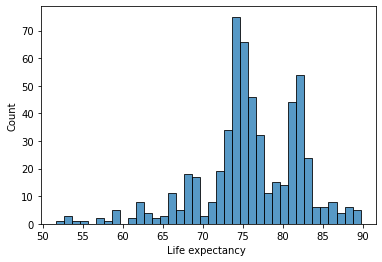

In [27]:
sns.histplot(data=merged_health_EDA['Life expectancy '], binwidth=1)

<AxesSubplot:xlabel='Diphtheria ', ylabel='Life expectancy '>

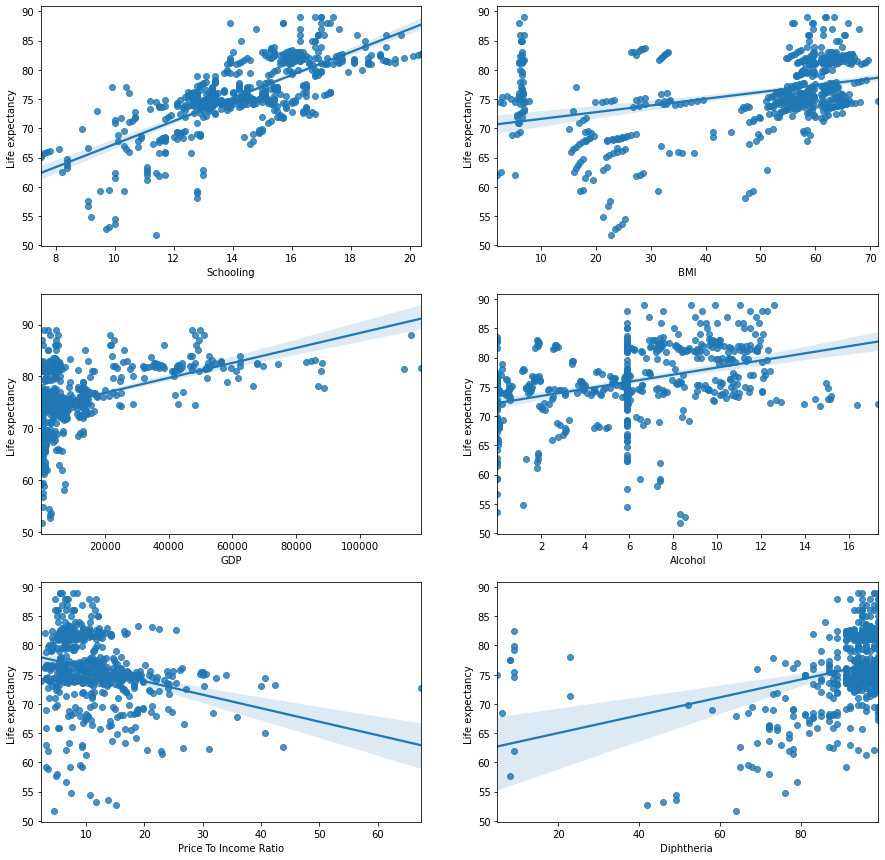

In [28]:
#Smoothed scatter plots (with a trend line)
fig, axs=plt.subplots(3,2, figsize=(15,15))
sns.regplot(data=merged_health_EDA, x='Schooling', y='Life expectancy ', ax= axs[0,0])
sns.regplot(data=merged_health_EDA, x= ' BMI ', y='Life expectancy ',ax= axs[0,1])
sns.regplot(data=merged_health_EDA, x="GDP", y="Life expectancy ", ax= axs[1,0])
sns.regplot(data=merged_health_EDA, x="Alcohol", y="Life expectancy ", ax= axs[1,1])
sns.regplot(data=merged_health_EDA, x='Price To Income Ratio', y="Life expectancy ", ax= axs[2,0])
sns.regplot(data=merged_health_EDA, x='Diphtheria ', y="Life expectancy ", ax= axs[2,1])

In [29]:
merged_health_EDA.corr()

,Price To Income Ratio,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
Price To Income Ratio,1.000000,-0.260924,-0.086768,-0.190602,-0.151489,0.118917,-0.143084,-0.075255,-0.001557,-0.074709,...,0.148054,0.161822,0.175353,0.219503,0.250138,0.183278,0.136995,0.194565,0.171150,0.158326
Life expectancy,-0.260924,1.000000,0.377783,0.388994,0.326434,-0.249560,0.370696,0.356164,-0.037112,0.364687,...,-0.165523,-0.114584,-0.126478,-0.039843,-0.047409,-0.017849,0.106597,-0.130156,-0.154721,-0.167925
Alcohol,-0.086768,0.377783,1.000000,0.315665,0.206320,-0.078734,0.216893,0.133567,-0.001539,0.084793,...,-0.085088,-0.058847,-0.056053,-0.026149,0.013425,0.000320,0.123345,-0.062859,-0.070658,-0.081063
percentage expenditure,-0.190602,0.388994,0.315665,1.000000,0.268510,-0.092325,0.139833,0.071403,-0.220122,0.063855,...,-0.094354,-0.085641,-0.089549,-0.068328,-0.074385,-0.062314,0.002890,-0.095317,-0.102925,-0.100298
Hepatitis B,-0.151489,0.326434,0.206320,0.268510,1.000000,-0.078319,0.037396,0.066460,-0.034840,0.049891,...,-0.068536,-0.060363,-0.066679,-0.036892,-0.068210,0.011281,-0.056092,-0.069419,-0.073307,-0.087720
Measles,0.118917,-0.249560,-0.078734,-0.092325,-0.078319,1.000000,-0.245441,-0.120164,-0.000195,-0.120536,...,0.748684,0.709073,0.724423,0.501437,0.461525,0.589759,0.345246,0.707121,0.739564,0.754060
BMI,-0.143084,0.370696,0.216893,0.139833,0.037396,-0.245441,1.000000,0.151354,0.041530,0.134383,...,-0.255113,-0.226331,-0.247505,-0.178846,-0.175881,-0.211077,-0.062851,-0.235153,-0.248633,-0.245709
Polio,-0.075255,0.356164,0.133567,0.071403,0.066460,-0.120164,0.151354,1.000000,-0.028505,0.695524,...,-0.036276,-0.001922,-0.025288,0.035427,-0.000701,0.036254,0.110191,-0.021939,-0.044024,-0.050921
Total expenditure,-0.001557,-0.037112,-0.001539,-0.220122,-0.034840,-0.000195,0.041530,-0.028505,1.000000,-0.053684,...,-0.013024,-0.010545,-0.013692,-0.008198,-0.012317,-0.012952,-0.008231,-0.011769,-0.012561,-0.011185
Diphtheria,-0.074709,0.364687,0.084793,0.063855,0.049891,-0.120536,0.134383,0.695524,-0.053684,1.000000,...,-0.038138,-0.006381,-0.034770,0.038422,-0.026067,0.031189,0.108994,-0.029964,-0.057165,-0.061032


In [30]:
#sns.pairplot(merged_health,hue="Life expectancy ")

# split train, val, and test

In [157]:
from sklearn.model_selection import train_test_split
X = merged_health.drop(['Life expectancy '], axis=1)
y = merged_health['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)


In [158]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=77) # 0.25 x 0.8 = 0.2

# Baseline Model

In [170]:
X_train_baseline = X_train[['Schooling', 'GDP']]
X_test_baseline = X_test[['Schooling', 'GDP']]

In [171]:
from sklearn.linear_model import LinearRegression

# baseline_reg = LinearRegression().fit(np.array(X_train_baseline).reshape(-1, 1), y_train)
baseline_reg = LinearRegression().fit(X_train_baseline, y_train)

In [172]:
# baseline_predict = baseline_reg.predict(np.array(X_test_baseline).reshape(-1, 1))
baseline_predict = baseline_reg.predict(X_test_baseline)

baseline_osr = OS_R_squared(baseline_predict, y_test,y_train)
baseline_mse = mean_squared_error(baseline_predict, y_test,y_train)

print('Baseline OSR^2:', baseline_osr)
print('Baseline MSE:', baseline_mse)

Baseline OSR^2: 0.6593097518164679
Baseline MSE: 0.3800112362581029


# Feature Selection

In [95]:
#using VIF to assess multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
#     vif = []
#     for i in range(num_columns):
#         print(values)
#         print(i)
#         vif.append(variance_inflation_factor(values,i))
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)



In [96]:
# cols = list(set(X_train.columns) - set(['Country', 'Year', 'Entity', 'Code', 'Status']))
cols = X_train.columns
VIF(X_train, cols).sort_values()

Total expenditure                                                           1.036638
Price To Income Ratio                                                       1.179592
GDP                                                                         1.188769
Hepatitis B                                                                 1.192883
 BMI                                                                        1.248956
 HIV/AIDS                                                                   1.286597
Alcohol                                                                     1.457508
Diphtheria                                                                  1.772479
Polio                                                                       1.807678
Population                                                                  2.179040
Schooling                                                                   2.345262
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (

In [97]:
#drop features to lower VIFs to below 5

cols = list(set(X_train.columns) - set(['Country', 'Year', 'Entity', 'Code', 'Status', 'Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)', 'Deaths – Outdoor air pollution (all ages) (IHME)','Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number), Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number)', 'Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)', 'Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)', 'Deaths - Child wasting - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in fruits - Sex: Both - Age: All Ages (Number)', 'Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number)', 'Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number)', 'Deaths - Smoking - Sex: Both - Age: All Ages (Number)', 'Deaths - Child stunting - Sex: Both - Age: All Ages (Number)', 'Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number)', 'Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)', 'Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number)', 'Deaths - Zinc deficiency - Sex: Both - Age: All Ages (Number)', 'Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)', 'Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number)', 'Deaths - Low physical activity - Sex: Both - Age: All Ages (Number)', 'Deaths - High fasting plasma glucose - Sex: Both - Age: All Ages (Number)', 'Deaths - Drug use - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in vegetables - Sex: Both - Age: All Ages (Number)', 'Deaths - Alcohol use - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number)', 'Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number)', 'Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number)', 'percentage expenditure', 'Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number)']))
VIF(X_train, cols).sort_values()



Total expenditure                                                           1.036638
Price To Income Ratio                                                       1.179592
GDP                                                                         1.188769
Hepatitis B                                                                 1.192883
 BMI                                                                        1.248956
 HIV/AIDS                                                                   1.286597
Alcohol                                                                     1.457508
Diphtheria                                                                  1.772479
Polio                                                                       1.807678
Population                                                                  2.179040
Schooling                                                                   2.345262
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (

<AxesSubplot:>

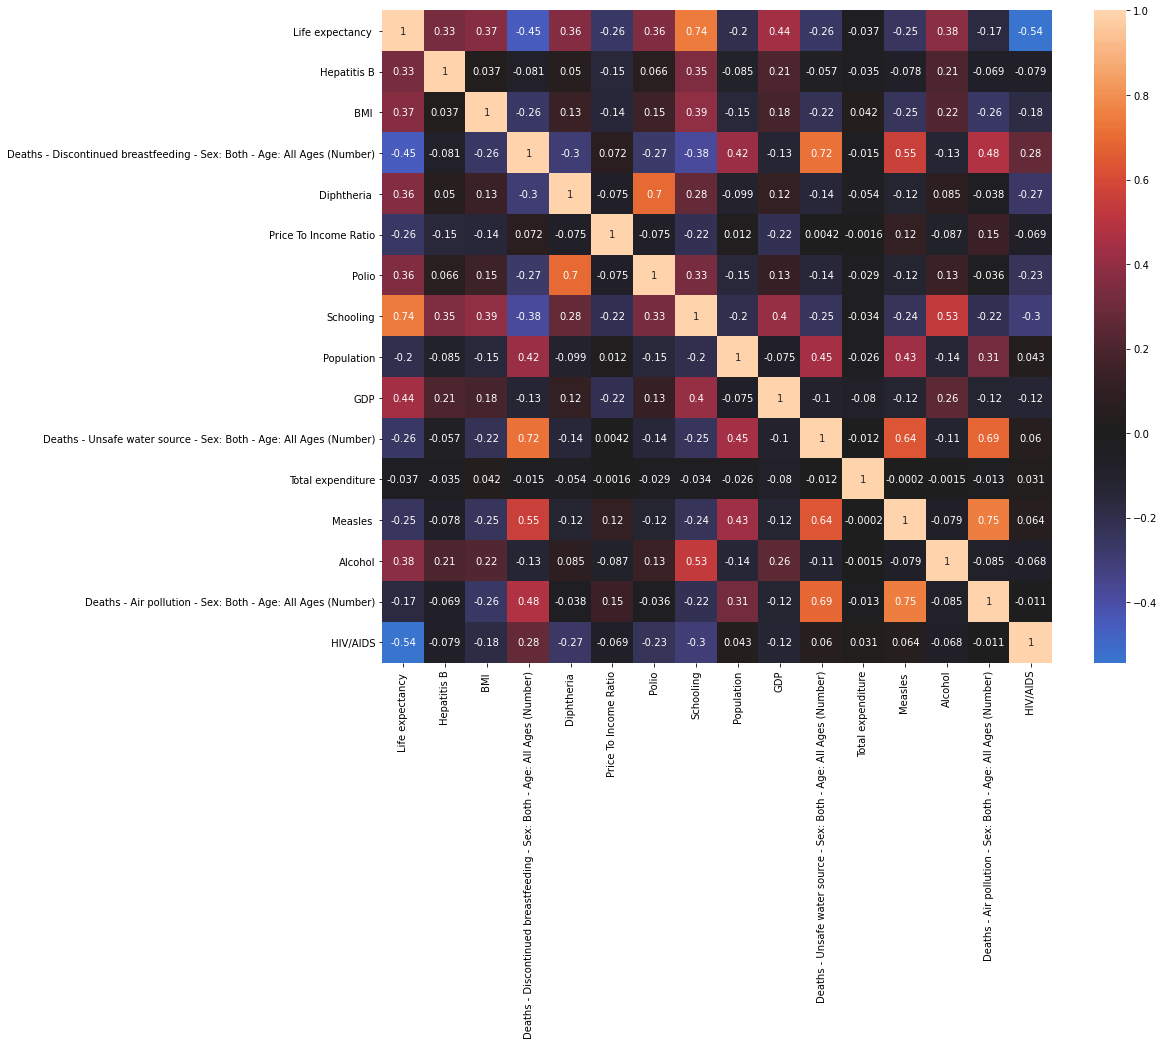

In [36]:
plt.figure(figsize=(15, 12))
sns.heatmap(merged_health[['Life expectancy '] + cols].corr(),center=0,annot=True)

In [174]:
X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

# KMeans Clustering

In [99]:
scaled = scaler.fit_transform(merged_health.values)
merged_health_scaled = pd.DataFrame(scaled, index=merged_health.index, columns=merged_health.columns)

In [100]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100, random_state=88)
kmeans.fit(merged_health_scaled[['Life expectancy '] + cols])


KMeans(max_iter=100, n_clusters=3, random_state=88)

In [101]:
kmeans_size = []
clusters = np.unique(kmeans.labels_)
for cluster in clusters:
    kmeans_size.append(len(np.where(kmeans.labels_ == cluster)[0]))

kmeans_size                       

[285, 268, 11]

In [42]:
#Standardized Cluster Centroids
merged_health_scaled['Cluster'] = kmeans.labels_
merged_health_scaled.groupby(['Cluster']).mean()

,Price To Income Ratio,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.236576,0.606976,0.568309,0.327900,0.296643,-0.197477,0.382562,0.291110,-0.003208,0.290594,...,-0.193898,-0.171576,-0.176206,-0.135318,-0.141262,-0.095457,0.043327,-0.183864,-0.193253,-0.200914
1,0.286930,-0.629772,-0.659541,-0.372276,-0.339155,0.053518,-0.398333,-0.292816,0.003316,-0.283047,...,0.056181,0.063041,0.066796,0.138953,0.165225,0.040928,-0.038426,0.087661,0.067268,0.061104
2,-0.099734,-2.181555,-0.441527,-0.444023,-0.347482,4.177630,-1.342827,-1.257694,0.011817,-1.467349,...,4.018712,3.250720,3.291397,0.519502,0.080274,1.674406,-0.305260,3.022957,3.747038,4.097898


In [106]:
wcss = []
for k in range(1, 5):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(merged_health_scaled)
    wcss.append(kmeans.inertia_)

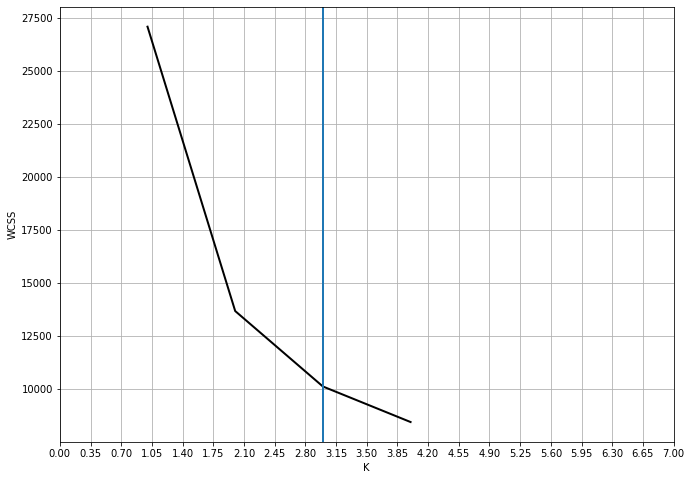

In [107]:
plt.figure(figsize=(11,8))
plt.plot(range(1, 5), wcss, linewidth=2, color='black')
plt.axvline(x=3, linewidth=2)
plt.xticks(np.linspace(0,7,21))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

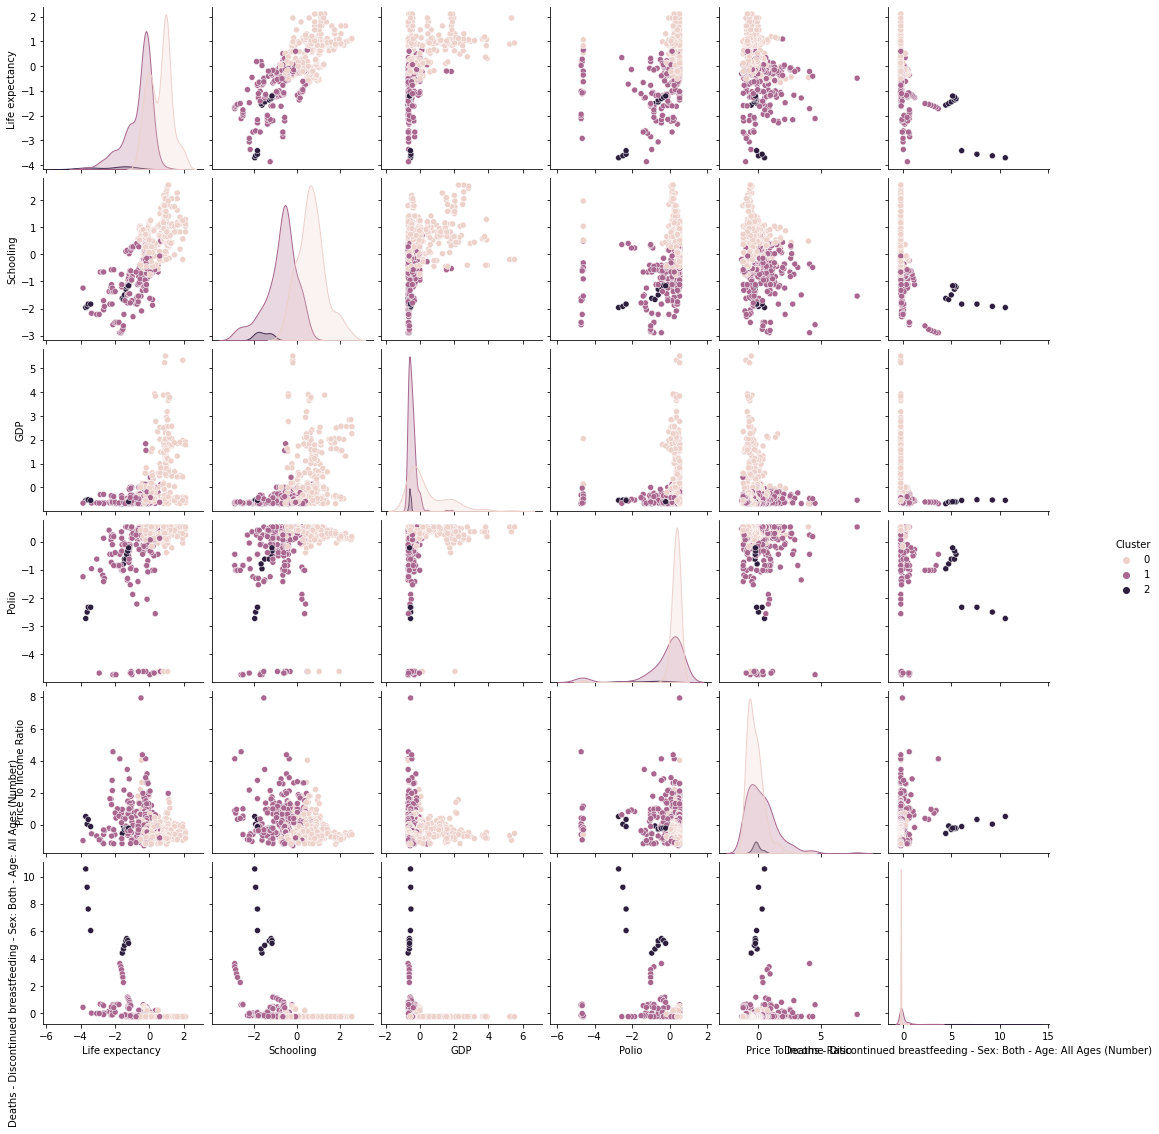

In [49]:
# import seaborn as sns

sns.pairplot(merged_health_scaled[['Life expectancy ', 'Schooling', 'Cluster', 'GDP', 'Polio', 'Price To Income Ratio', 'Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)']], hue='Cluster')
plt.show()

# Models 

In [26]:
#Metrics Functions
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [27]:
import time 

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

# Model 0: PCR

In [28]:
#before any feature selection

X_train_pcr, X_test_pcr, y_train_pcr, y_test_pcr = train_test_split(X, y, test_size=0.20, random_state=77)
X_train_pcr, X_val_pcr, y_train_pcr, y_val_pcr = train_test_split(X_train_pcr, y_train_pcr, test_size=0.25, random_state=77)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pca = PCA(random_state=88)
lr = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lr', lr)])

In [30]:
param_grid = {'pca__n_components': np.linspace(1, 47, 47).astype('int')}

pcr_cv = GridSearchCV(pipe,
                      param_grid,
                      scoring='r2',
                      cv=5)
pcr_cv.fit(X_train_pcr, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=88)),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             scoring='r2')

In [181]:
pcr_cv.best_params_

{'pca__n_components': 14}

In [31]:
pcr_predict = pcr_cv.predict(X_test_pcr)


pcr_osr = OS_R_squared(pcr_predict, y_test,y_train)
pcr_mse = mean_squared_error(pcr_predict, y_test,y_train)

print('PCR OSR^2:', pcr_osr)
print('PCR MSE:', pcr_mse)

PCR OSR^2: 0.7673572974435218
PCR MSE: 0.2594933124040817


# Bootstrapping & CI for PCR

In [108]:
bs_output = bootstrap_validation(X_test_pcr,y_test,y_train_pcr,pcr_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.67 
0.975-quantile of the estimate: 0.84 


# Model 1: Ridge Regression

In [175]:
#lasso/ridge
from sklearn.linear_model import Ridge


ridge2 = Ridge(alpha = 115)
ridge2.fit(X_train, y_train)                      
print(pd.Series(ridge2.coef_, index = X_train.columns)) # Print coefficients


GDP                                                                         0.144771
Schooling                                                                   0.286830
Measles                                                                    -0.011221
 HIV/AIDS                                                                  -0.266923
Deaths - Air pollution - Sex: Both - Age: All Ages (Number)                 0.038925
Price To Income Ratio                                                      -0.111804
Population                                                                 -0.020634
Total expenditure                                                          -0.015989
Alcohol                                                                     0.065584
 BMI                                                                        0.067367
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)   -0.104803
Polio                                                            

In [64]:
#Ridge Hyper-Parameter Tuning
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}
rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1....
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

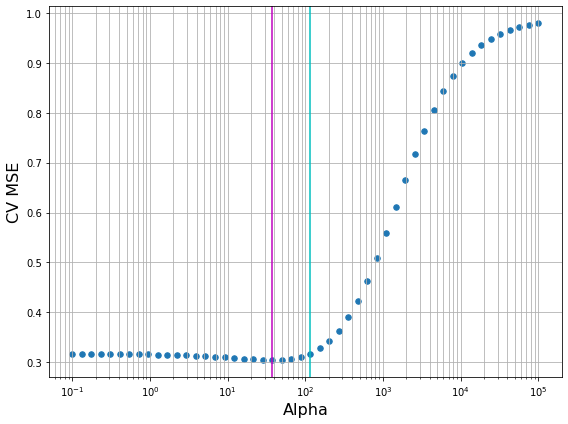

In [65]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [66]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 115.1395399326447


In [67]:
rr_cv = GridSearchCV(rr, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train, y_train)

rr_predict = rr_cv.predict(X_test)


rr_osr = OS_R_squared(rr_predict, y_test,y_train)
rr_mse = mean_squared_error(rr_predict, y_test,y_train)

print('Ridge Regression OSR^2:', rr_osr)
print('Ridge Regression MSE:', rr_mse)

Ridge Regression OSR^2: 0.7471464433854409
Ridge Regression MSE: 0.28203681541713516


# Bootstrapping & CI for Ridge Regression

In [98]:


bs_output = bootstrap_validation(X_test,y_test,y_train,rr_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.64 
0.975-quantile of the estimate: 0.81 


# Model 2: Random Forest with CV 

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

grid_values = {'max_features': np.linspace(1,15,15, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
cv = KFold(n_splits=5,random_state=88,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [100],
                         'random_state': [88]},
             scoring='r2')

In [182]:
rf_cv.best_params_

{'max_features': 11,
 'min_samples_leaf': 5,
 'n_estimators': 100,
 'random_state': 88}

(0.5, 1.0)

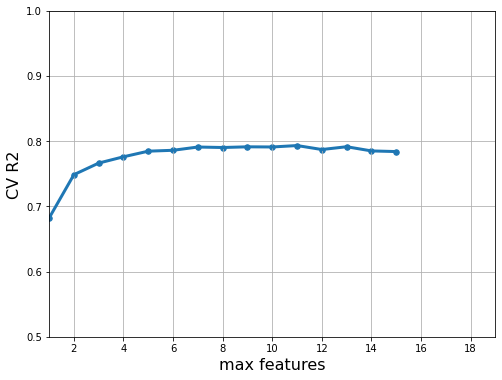

In [40]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.5, 1])

In [41]:
pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,GDP,5.8
1,Schooling,24.8
2,Measles,0.6
3,HIV/AIDS,8.7
4,Deaths - Air pollution - Sex: Both - Age: All ...,2.7
5,Price To Income Ratio,5.3
6,Population,1.4
7,Total expenditure,0.3
8,Alcohol,1.7
9,BMI,1.1


In [183]:
rf_predict = rf_cv.predict(X_test)

X_test
rf_osr = OS_R_squared(rf_predict, y_test,y_train)
rf_mse = mean_squared_error(rf_predict, y_test,y_train)


# print('Random Forest Cross-validated R2:', round(rf_cv.best_score_, 5))
print('Random Forest OSR2:', rf_osr)
print('Random Forest MSE:', rf_mse)


Random Forest OSR2: 0.8535707343390638
Random Forest MSE: 0.1633294952375694


# Bootstrapping & CI for Random Forest

In [198]:
bs_output_rf = bootstrap_validation(X_test,y_test,y_train,rf_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output_rf
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output_rf[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output_rf[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.80 
0.975-quantile of the estimate: 0.89 


# Model 3: SVR

In [43]:
from sklearn.svm import SVR
grid_values = {'kernel': ['rbf', 'poly', 'sigmoid'],
               'gamma': [1,0.1,0.01,0.001],
               'epsilon': [0.1, 0.001],
               'C': [1, 10, 100, 1000]} 

svr_cv = SVR() 
cv = KFold(n_splits=5,random_state=88,shuffle=True) 
svr_cv = GridSearchCV(svr_cv, param_grid=grid_values, scoring='r2', cv=cv)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'epsilon': [0.1, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='r2')

In [44]:
svr_cv.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [45]:
svr_predict = svr_cv.predict(X_test)


svr_osr = OS_R_squared(svr_predict, y_test,y_train)
svr_mse = mean_squared_error(svr_predict, y_test,y_train)

print('SVR OSR^2:', svr_osr)
print('SVR MSE:', svr_mse)


SVR OSR^2: 0.8046486930089898
SVR MSE: 0.21789790600140307


# Bootstrapping & CI for SVR

In [129]:
bs_output_svr = bootstrap_validation(X_test,y_test,y_train,svr_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output_svr
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output_svr[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output_svr[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.69 
0.975-quantile of the estimate: 0.85 


# Model 4: NN regressor

In [178]:
from sklearn.neural_network import MLPRegressor

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [(100,100),(200,),(300,),(500,)]
        }
       ]


In [179]:
mlp = GridSearchCV(MLPRegressor(), param_grid, cv=5,
                           scoring='r2')
mlp.fit(X_train,y_train)


print("Best parameters set found:")
print(mlp.best_params_)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Best parameters set found:
{'activation': 'relu', 'hidden_layer_sizes': (300,), 'solver': 'adam'}


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [180]:
mlp_predict = mlp.predict(X_test)


mlp_osr = OS_R_squared(mlp_predict, y_test,y_train)
mlp_mse = mean_squared_error(mlp_predict, y_test,y_train)

print('NN OSR^2:', mlp_osr)
print('NN MSE:', mlp_mse)


NN OSR^2: 0.8379187043519782
NN MSE: 0.18078801451440257


# Bootstrapping & CI for NN regressor

In [184]:
bs_output_svr = bootstrap_validation(X_test,y_test,y_train,mlp,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output_svr
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output_svr[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output_svr[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.74 
0.975-quantile of the estimate: 0.90 


# Model 5: Blended Model

In [81]:
val = pd.concat([X_val, y_val], axis=1)
blend_val_df = val.copy()


In [82]:
X_val_pcr

,Price To Income Ratio,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,...,Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet low in fiber - Sex: Both - Age: All Ages (Number),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in legumes - Sex: Both - Age: All Ages (Number),Deaths - Diet low in calcium - Sex: Both - Age: All Ages (Number),Deaths - Diet high in red meat - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number),Deaths - Diet low in seafood omega-3 fatty acids - Sex: Both - Age: All Ages (Number)
358,-0.896882,1.179597,-0.241976,-0.336238,-0.234165,0.718015,0.355762,-0.464238,0.350795,-0.229875,...,-0.240469,-0.233160,-0.282351,-0.179726,-0.263560,-0.293175,-0.211900,-0.277238,-0.298456,-0.274663
300,0.467631,-0.388090,-0.469155,-0.337240,-0.240205,0.475271,0.070424,-0.464238,0.015231,-0.229875,...,-0.185327,-0.174639,-0.161537,-0.129787,-0.184082,-0.141879,-0.286439,-0.187535,-0.162315,-0.177136
230,-0.164981,0.462793,-0.421931,-0.336989,-0.236581,0.336561,0.184559,-0.464238,0.082344,-0.229875,...,-0.222949,-0.223848,-0.252555,-0.158693,-0.175330,-0.300062,-0.304848,-0.227876,-0.262570,-0.233848
222,0.053455,0.627813,-0.100068,-0.337240,-0.240084,0.703153,0.526964,-0.464239,0.015231,-0.229875,...,-0.148573,-0.113055,-0.052191,-0.114741,0.110791,0.050587,0.921736,-0.100926,-0.078633,-0.166916
503,0.008065,0.000000,-0.474158,-0.337240,-0.239843,0.648659,0.184559,2.154066,0.149457,-0.229875,...,-0.244315,-0.239542,-0.292372,-0.178649,-0.270868,-0.313141,-0.296117,-0.278933,-0.304610,-0.277411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.078986,0.424116,1.120356,-0.336238,-0.240326,0.807186,0.298694,-0.464238,0.283682,-0.229875,...,-0.086328,-0.009541,0.074609,-0.056641,0.182980,0.367662,0.932635,0.052223,-0.007952,-0.010343
347,-0.736602,0.841823,2.832284,-0.336739,-0.239359,0.970666,0.127491,-0.464238,0.082344,-0.229875,...,-0.242647,-0.236315,-0.278255,-0.178991,-0.266581,-0.253046,-0.175762,-0.273552,-0.299175,-0.274910
329,-0.308241,-1.050747,-0.419399,-0.336739,-0.217374,-2.184998,0.241626,-0.464238,-0.253219,2.649023,...,-0.143697,-0.207150,-0.269975,-0.170494,-0.288945,-0.260241,-0.301944,-0.222791,-0.250260,-0.229246
14,0.325790,1.429705,-0.051358,2.953625,-0.240205,0.708107,0.526964,-0.464238,0.552133,-0.229875,...,-0.197362,-0.185588,-0.140333,-0.105468,-0.087283,-0.069543,-0.083268,-0.178568,-0.165805,-0.172933


In [83]:
#ridge
# val_pred_ridge = rr_cv.predict(X_val)

#svr
val_pred_svr = svr_cv.predict(X_val)

#rf
val_pred_rf = rf_cv.predict(X_val)

#pcr
# val_pred_pcr = pcr_cv.predict(X_val_pcr)
#NN
val_pred_nn = mlp.predict(X_val)

In [84]:
# blend_val_df['val_pred_ridge']=val_pred_ridge
blend_val_df['val_pred_svr']=val_pred_svr
blend_val_df['val_pred_rf']=val_pred_rf
blend_val_df['val_pred_nn']=val_pred_nn
# blend_val_df['val_pred_pcr']=val_pred_pcr

In [85]:
blend_val_df = blend_val_df.rename(columns={'Life expectancy ':'Life_expectancy'})


In [86]:
# blending_ols = smf.ols(formula='Life_expectancy ~ val_pred_ridge+val_pred_svr+val_pred_rf + val_pred_nn + val_pred_pcr -1', data=blend_val_df)
# blending_res = blending_ols.fit()
# print(blending_res.summary())

blending_ols = smf.ols(formula='Life_expectancy ~ val_pred_svr+val_pred_rf + val_pred_nn -1', data=blend_val_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              231.9
Date:                Tue, 11 May 2021   Prob (F-statistic):                    2.16e-47
Time:                        02:27:49   Log-Likelihood:                         -43.467
No. Observations:                 113   AIC:                                      92.93
Df Residuals:                     110   BIC:                                      101.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [74]:
#blended test dataframe

In [87]:
test = pd.concat([X_test, y_test], axis=1)
blend_test_df = test.copy()

In [88]:
#ridge
# test_pred_ridge = rr_cv.predict(X_test)

#svr
test_pred_svr = svr_cv.predict(X_test)

#rf
test_pred_rf = rf_cv.predict(X_test)

#nn
test_pred_nn = mlp.predict(X_test)

#pcr
# test_pred_pcr = pcr_cv.predict(X_test_pcr)

In [89]:
# blend_test_df['test_pred_ridge']=test_pred_ridge
blend_test_df['test_pred_svr']=test_pred_svr
blend_test_df['test_pred_rf']=test_pred_rf
blend_test_df['test_pred_nn']=test_pred_nn
# blend_test_df['test_pred_pcr']=test_pred_pcr

In [90]:
blend_test_df = blend_test_df.rename(columns={'Life expectancy ':'Life_expectancy'})

In [91]:
# blend_test_temp = blend_test_df.rename(columns={"test_pred_ridge":"val_pred_ridge","test_pred_svr":"val_pred_svr","test_pred_rf":"val_pred_rf" })
# test_pred_blended =blending_res.predict(blend_test_temp)
# blend_test_df['pred_blended']= test_pred_blended

blend_test_temp = blend_test_df.rename(columns={"test_pred_nn":"val_pred_nn","test_pred_svr":"val_pred_svr","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended


In [92]:

blend_predict = blend_test_df['pred_blended']

blend_osr = OS_R_squared(blend_predict,blend_test_df['Life_expectancy'],blend_val_df['Life_expectancy'])
blend_mse = mean_squared_error(blend_predict,blend_test_df['Life_expectancy'],blend_val_df['Life_expectancy'])

print('Blend OSR^2:', blend_osr)
print('Blend MSE:', blend_mse)


Blend OSR^2: 0.8728855110551211
Blend MSE: 0.14249592318060975


# Bootstrapping & CI for Blended Model


In [94]:
X_test = blend_test_temp[['val_pred_nn','val_pred_svr','val_pred_rf']]
y_test = blend_test_df['Life_expectancy']
y_train = blend_val_df['Life_expectancy']

bs_output_blend = bootstrap_validation(X_test,y_test,y_train,blending_res,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 5000)
bs_output_blend
print("0.025-quantile of the estimate: %.2f " % np.quantile(bs_output_blend[0], 0.025))
print("0.975-quantile of the estimate: %.2f " % np.quantile(bs_output_blend[0], 0.975))

(5000, 3)
0.025-quantile of the estimate: 0.83 
0.975-quantile of the estimate: 0.91 
